##Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Linking Dataset

In [ ]:
titanic_df=pd.read_csv('https://raw.githubusercontent.com/sun8338/Titanic---Machine-Learning-from-Disaster/main/train.csv')

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('\n ###Train Data Information### \n')
titanic_df.info()


 ###Train Data Information### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Pre-processing

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('Dataset Null Count', titanic_df.isnull().sum().sum())

Dataset Null Count 0


In [ ]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
print('\nSex Feature Portion : \n', titanic_df['Sex'].value_counts())
print('\nCabin Feature Portion : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked Feature Portion : \n', titanic_df['Embarked'].value_counts())


Sex Feature Portion : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin Feature Portion : 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked Feature Portion : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [ ]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- Of 314 women, 233 women survived (74.25%) 
- Of 577 men, 109 men survived (18.8%)

##Visualization

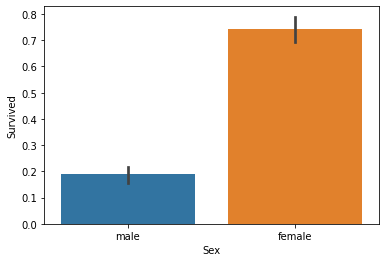

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

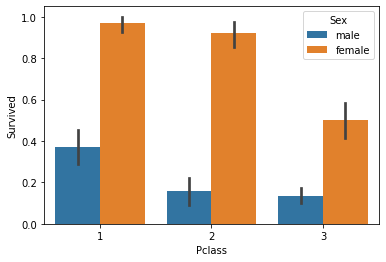

In [ ]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df)

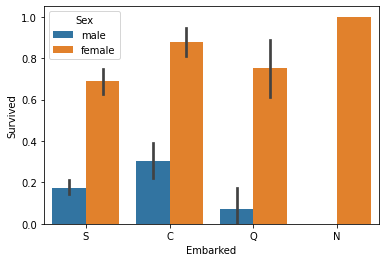

In [ ]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=titanic_df)

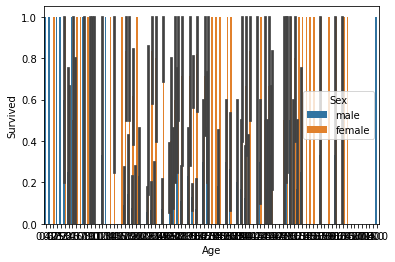

In [ ]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=titanic_df)

In [ ]:
def get_category(age):
    cat=""
    if age <=-1: cat="Unknown"
    elif age <=5: cat="Baby"
    elif age <=12: cat="Child"
    elif age <=18: cat="Teenager"
    elif age <=25: cat="Student"
    elif age <=35: cat="Young Adult"
    elif age <=60: cat="Adult"
    else : cat="Elderly"

    return cat

In [ ]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [ ]:
group_names=["Unknown", "Baby", "Child", "Teenager", "Student", "Young Adult", "Adult", "Elderly"]

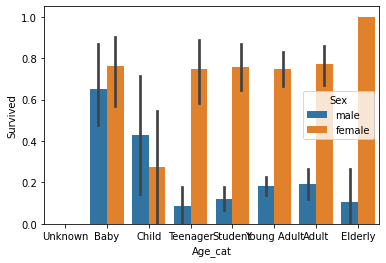

In [ ]:
titanic_df["Age_cat"]=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)